# 04 PyTorch Custom Datasets Video Notebook
We've used some datasets with PyTorch before.
But how do you get your own data into PyTorch?
One of the ways to do so is via: custom datastes
### Domain Libraries
Depending on what you are working on, vision, text, ausion, you'll want to look into each of the PyTorch domain Libraries for existing data loading functions and Customizable data loading functions


In [165]:
### 0. Importing Pytorch and setting up device agnostic code
import torch
from torch import nn
# Note: PyTorch 1.10.0 is required for this course
torch.__version__

'2.1.2+cu121'

In [166]:
device = torch.device("cuda") if torch.cuda.is_available() else "cpu"
device

device(type='cuda')

In [167]:
# Set up device agnostic code 
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

### 1. Get data
our dataset is a subset of Food101 dataset

Food101 starts 101 different classes of food and 1000 images per class (750 training ,250 testing)
Our dataset starts with 3 classes of food and only 10% of the images (75 training, 25 testing)
why do this?
When starting our ML projects, it's important to try things on a small scale and then increase the scale when necessary.
The whole point is to speed up how fast you can experiment


In [169]:
import requests
import zipfile
from pathlib import Path

# set up path to a data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory already exists... skipping download")
else:
    print(f"{image_path} doesnot exist, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak amd sushi data
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
    requests = requests.get("https://github.com/mrdbourke/pytorch-deep-Learning/raw/main/data/pizza_steak_sushi.zip")
    print("Downlaoading pizzza, steak, sushi data....")
    f.write(requests.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
    print("Unzipping pizza, steak and sushi data")
    zip_ref.extractall(image_path)

data/pizza_steak_sushi directory already exists... skipping download
Downlaoading pizzza, steak, sushi data....
Unzipping pizza, steak and sushi data


### 2. Becoming one with the data (data preparation and data exploration)

In [170]:
import os
def walk_through_dir(dir_path):
    """ walks through dir_path returning its contents"""
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'. ")

In [171]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'. 
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'. 
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'. 
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'. 
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'. 
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'. 
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'. 
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'. 
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'. 


In [172]:
# Setup train and test path
train_dir = image_path/"train"
test_dir = image_path/"test"
train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

### 2.1 Visualize and image
let's write some code to:
1. Get all of the image paths
2. pick a random image path using Python's random.choice()
3. Get the image class name using `pathlib.Path.parent.stem`
4. since we are working with images, let's open the image with Python's PIL
5. we'll then show the image and print metadata

data/pizza_steak_sushi/test/sushi/1742201.jpg
sushi
Image height: 512
Image width: 512


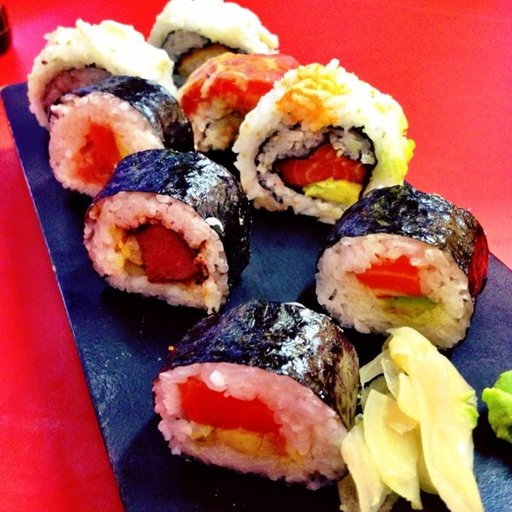

In [173]:
import random
from PIL import Image
# set seed
random.seed(42)

#1. Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. pick a random image path
random_image_path = random.choice(image_path_list)
print(random_image_path)

#3. Get image class from path name (the image class is the name of the directory where the directory is stored)
image_class = random_image_path.parent.stem
print(image_class)

#4. Open image
img =Image.open(random_image_path)

# 5. print metadata
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

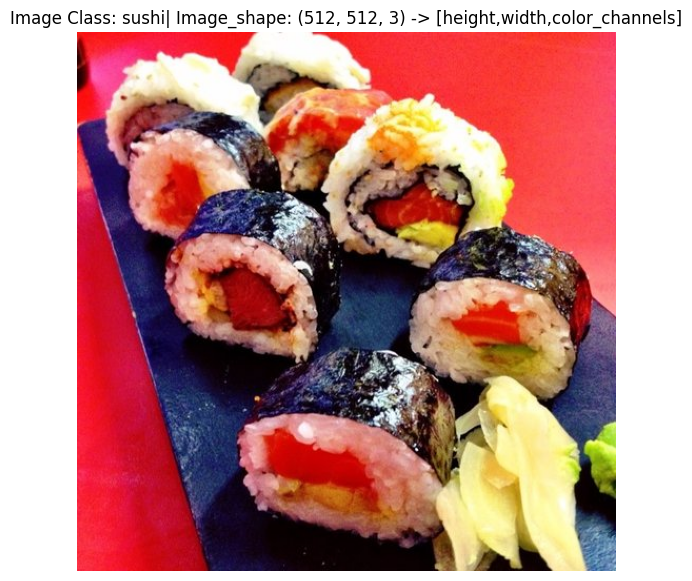

In [174]:
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"Image Class: {image_class}| Image_shape: {img_as_array.shape} -> [height,width,color_channels]")
plt.axis(False);


In [175]:
img_as_array

array([[[252,  19,  15],
        [250,  21,  16],
        [249,  26,  19],
        ...,
        [251,  56,  96],
        [249,  54,  98],
        [255,  61, 105]],

       [[251,  22,  19],
        [250,  22,  19],
        [245,  26,  20],
        ...,
        [252,  57,  97],
        [249,  54,  96],
        [255,  61, 105]],

       [[246,  22,  20],
        [243,  24,  20],
        [239,  24,  19],
        ...,
        [253,  58,  98],
        [249,  54,  96],
        [255,  61, 103]],

       ...,

       [[253,  47,  70],
        [255,  51,  74],
        [255,  49,  72],
        ...,
        [110, 151, 183],
        [108, 149, 179],
        [ 91, 132, 160]],

       [[245,  39,  62],
        [244,  38,  61],
        [248,  42,  65],
        ...,
        [103, 144, 176],
        [100, 141, 169],
        [113, 157, 182]],

       [[248,  42,  65],
        [243,  37,  60],
        [251,  45,  68],
        ...,
        [126, 167, 197],
        [ 99, 143, 170],
        [114, 158, 183]]

### 3. Transforming data 
Before we can use our image data with PyTorch:
1. Turn your data target data into tensors (in our case, numerical representation of our images).
2. Turn it into a  'torch.utils.data.Dataset' and subsequently a 'torch.utils.data.DataLoader'
3. We'll call these 'Dataset' and 'DataLoader'.


In [176]:
import torch 
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


### 3.1 Transforming data with torchvision.transforms
Transforms help you get your images ready to be used with a model/ perform data augmentation

In [177]:
# write a transform for image
data_transform = transforms.Compose([
    # Resize our images
    transforms.Resize(size= (64,64)),  # This will produce a ouput size of (3,224,224) automatically if you give the inputimg of shape (512,512,3)
    # Flip the images randomly
    transforms.RandomHorizontalFlip(p=0.5),
    # Turn the image into torch.Tensor
    transforms.ToTensor()
])  # You can also use nn.Sequential()

In [178]:
data_transform(img).shape

torch.Size([3, 64, 64])

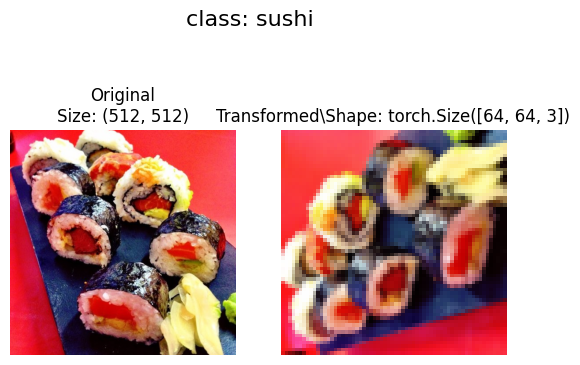

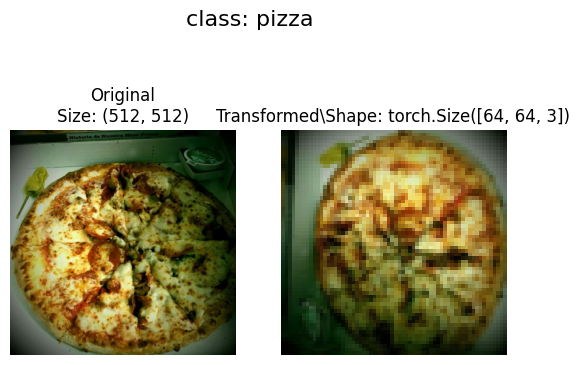

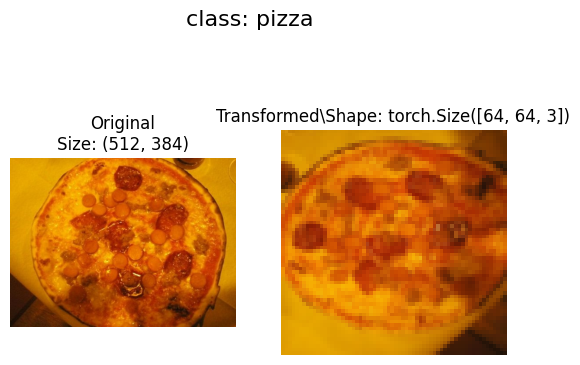

In [179]:
def plot_transformed_images(image_paths:list, transform, n=3, seed =None):
    """ Selects random images from a path of images and labels/transforms them and then plot the original vs transformed version"""
    if seed:
        random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig,ax = plt.subplots(nrows=1, ncols =2)
            ax[0].imshow(f)  # on the 0 axis, we're going to plot the original image
            ax[0].set_title(f"Original\nSize: {f.size}")
            ax[0].axis(False)

            # Transform and plot target image
            transformed_image = transform(f).permute(2,1,0)  # Note we will need to change shape for matplotlib
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed\Shape: {transformed_image.shape}")
            ax[1].axis(False)

            fig.suptitle(f"class: {image_path.parent.stem}" , fontsize=16)

plot_transformed_images(image_paths = image_path_list, transform=data_transform, n=3, seed=42)

### 4. Option 1: Loading image data using *ImageFolder*

We can load image classification data using *torchvision.datasets.ImageFolder*

In [226]:
# USe ImageFolder to create dataset(s)

from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                    transform = data_transform, # a transform for the data
                                    target_transform = None)  # a transform for the label/target
test_data = datasets.ImageFolder(root=test_dir,
                                    transform=data_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [181]:
train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

In [182]:
# Get class names as list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [183]:
# Get class names as dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [184]:
# Check the length of our dataset
len(train_data), len(test_data)

(225, 75)

In [185]:
train_data.samples[0]

('data/pizza_steak_sushi/train/pizza/1008844.jpg', 0)

In [186]:
# Index on the train_data Dataset to get a single image and label
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype:{img.dtype}")
print(f"Image Label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.09

Original Shape: torch.Size([3, 64, 64]) -> [color_channel, height, width]
 Image Permute: torch.Size([64, 64, 3]) -> [height, width, color_channel]


Text(0.5, 1.0, 'pizza')

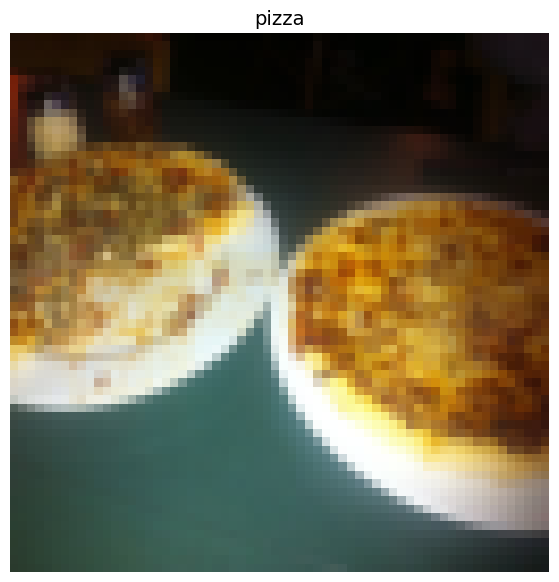

In [187]:
# Rearrange the order dimensions
img_permute = img.permute(1,2,0)

# printout different shapes
print(f"Original Shape: {img.shape} -> [color_channel, height, width]")
print(f" Image Permute: {img_permute.shape} -> [height, width, color_channel]")

# Plot the image
plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.axis(False)
plt.title(class_names[label], fontsize=14)

### 4.1 Turn loaded images into *DataLoader*s
A *DataLoader* is going to help us turn our *Dataset's* into *iterables* and we can customize the *batch_size*. So our model can see *batch_size* images at a time.

In [188]:
import os 
os.cpu_count()

48

In [189]:
# Turn train and test datasets into DataLoader'set
from torch.utils.data import DataLoader
BATCH_SIZE=5
train_dataloader = DataLoader(dataset = train_data, batch_size = BATCH_SIZE, num_workers=os.cpu_count(), shuffle=True)
test_dataloader =  DataLoader(dataset = test_data, batch_size = BATCH_SIZE, num_workers=os.cpu_count(), shuffle=True)

train_dataloader, test_dataloader


(<torch.utils.data.dataloader.DataLoader at 0x7fd11f65b070>,
 <torch.utils.data.dataloader.DataLoader at 0x7fd11f65ba00>)

In [190]:
len(train_dataloader), len(test_dataloader)

(45, 15)

In [209]:
img,label = next(iter(train_dataloader))

# Batch size will now be 1 , you can change the batch size if you want
print(f"Image Shape: {img.shape} -> [batch_size, color_channel, height, width]")
print(f"Label Shape: {label.shape}")

Image Shape: torch.Size([5, 3, 64, 64]) -> [batch_size, color_channel, height, width]
Label Shape: torch.Size([5])


### 5. Option 2: Loading Image data with a custom 'Dataset'
1. want to be able to load Images from file
2. want to be able to get class names from the dataset
3. want to be able to get classes as dictionary from the dataset

Pros: 
* Can create a 'Dataset' out of almost anything
* Not limited to PyTorch pre-built 'Dataset' Functions

Cons:
* Even though you could create 'Dataset' out of almost anything, it doesn't mean it will work...
* Using a Custom 'Dataset' often results in us writing more code, which could be prone to errors orperformance issues

In [211]:
import os
import pathlib 
import torch
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [212]:
# Instance of torchvision.datasets.ImageFolder()
train_data.classes,train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.1 Creating a helper function to get class names
we want function to:
1. Get the class names using 'os.scandir()' to traverse a target directory (ideally the directory is in standard image classification format)
2. rause an error if the class names aren't found (if this happens, there might be something wrong with the directory structure)
3. Turn the class names into a dict and a list and return them 

In [213]:
## Set up path for target directory
target_directory = train_dir
print(f"Target dir: {target_directory}")

## Get the class names from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

Target dir: data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [214]:
list(os.scandir(target_directory))

[<DirEntry 'pizza'>, <DirEntry 'steak'>, <DirEntry 'sushi'>]

In [215]:
def find_classes(directory : str) -> Tuple[List[str] , Dict[str, int]]:
    """ Find the class folder names in a target directory"""
    #1. Get the class names by scanning the target directory
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

    #2. Raise an error if class names could not be found
    if not classes:
        raise FileNotFoundError(f"couldn't find any classes in {directory}... please check file structure")
    
    #3. Create a dictionary of index labels (computers prefer numbers rather than strings as labels)
    class_to_idx = {class_name: i for i, class_name in enumerate(classes)}

    return classes, class_to_idx

In [216]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.2 Create a custon 'dataset' to replicate 'ImageFolder'
To create our own custon dataset, we want to:
1. Subclass 'torch.utils.data.Dataset' 
2. Init our subclass with a target directory (the directory we'd like to get data from) as well as a transform if we'd like to transform our data.
3. Create several attributes:
    * paths - paths of our images
    * transform - the transform we'd like to use
    * classes - a list of the target classes
    * class_to_idx - a dict of the target classes mapped to integer labels
4. Create a function to 'load_images()', this function will open an image
5. overwrite the __getitem()__ method to return a given sample when passes an index
6. Overwrite the __len()__ method to return the length of our dataset


In [217]:
#0. Write a custom dataset class
from torch.utils.data import Dataset

#1. Subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):
    # 2. Initialize our Custom dataset
    def __init__(self,
                targ_dir: str,
                transform:None):
        # 3. Create class attributes
        # Get all of the image paths
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
        # setup transforms
        self.transform = transform
        # create class and class_to_idx attributes
        self.classes, self.class_to_idx = find_classes(targ_dir)

    # 4. Create a function to load images
    def load_image(self, index:int)-> Image.Image:
        "Opens an Image via a path and returns it"
        image_path = self.paths[index]
        return Image.open(image_path)
    
    # 5. Overwrite __len__()
    def __len__(self) -> int:
        # Returns the total numbeer of samples
        return len(self.paths)
    
    # 6. Overwrite __getitem__() method to return a particular sample
    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        "returns one sample of data, data and label (X,y)."
        img = self.load_image(index)
        class_name = self.paths[index].parent.name # expects paths in format: data_folder/class_name/image.jpg
        class_idx = self.class_to_idx[class_name]

        # Transform if necessary
        if self.transform:
            return self.transform(img), class_idx # return data, label (X,y)
        else:
            return img, class_idx # return untransformed image


In [218]:
# create a transform
from torchvision import transforms

train_transforms = transforms.Compose([
                                    transforms.Resize(size=(64,64)),
                                    transforms.RandomHorizontalFlip(p=0.5),
                                    transforms.ToTensor()
])

test_transforms = transforms.Compose([
                                    transforms.Resize(size=(64,64)),
                                    transforms.ToTensor()
])

In [219]:
# Test out ImageFolderCustom
train_data_custom = ImageFolderCustom(targ_dir = train_dir, transform = train_transforms)

test_data_custom = ImageFolderCustom(targ_dir=test_dir, transform=test_transforms)


In [220]:
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7fd11f75a430>,
 <__main__.ImageFolderCustom at 0x7fd11f75a640>)

In [221]:
len(train_data_custom), len(test_data_custom)

(225, 75)

In [222]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [223]:
# check for equality between original ImageFolder dataset and ImageFolderCustom dataset
print(train_data_custom.classes == train_data.classes)
print(test_data_custom.classes == test_data.classes)

True
True


### 5.3 Create a function to display random images
1. Take in a dataset and a number of other parameters such as the class names and how many images to visualize.
2. To prevent the display getting out of hand, let's cap the number of images to see at 10.
3. Set the random seed for reproducibility
4. Get a list of random sample indexes from the target dataset.
5. Setup a matplot lib plot. 
6. Loop through the random sample indexes and plot them with matplotlib
7. Make sure the dimensions of our images line up with matplotlib (HWC)


In [233]:
#1. Create a function to take in a dataset
def disply_random_images(dataset: torch.utils.data.Dataset,
                            classes: List[str] = None,
                            n:int = 10,
                            display_shape: bool = True,
                            seed: int = None):
    #2. Adjust the display if n is too high
    if n > 10:
        n=10
        display_shape = False
        print(f"For display purposes, n shouldn't be larger than 10 , setting to 10 and removing shape display.")

    # 3. set the seed
    if seed:
        random.seed(seed)

    # 4. Get random sample indexes
    random_sample_idx = random.sample(range(len(dataset)), k=n)

    # 5. setup plot
    plt.figure(figsize=(16,8))

    # 6.  loop through random_indexes and plot them with matplotlib
    for i, targ_sample in enumerate(random_sample_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

        # 7. Adjust tensor dimension for plotting
        targ_image_adjust = targ_image.permute(1,2,0)

        # Plot adjusted samples
        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        if classes: 
            title = f"class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)

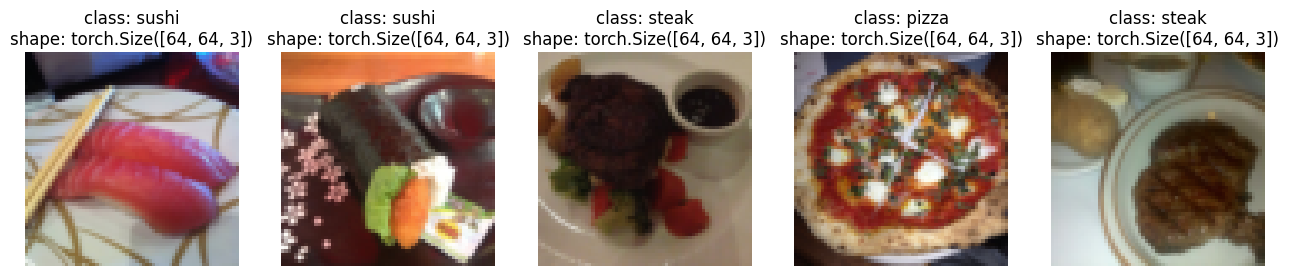

In [238]:
# Display random images from the ImageFolder Dataset
disply_random_images(dataset=train_data,
                        n=5,
                        classes = class_names,
                        seed = None)


For display purposes, n shouldn't be larger than 10 , setting to 10 and removing shape display.


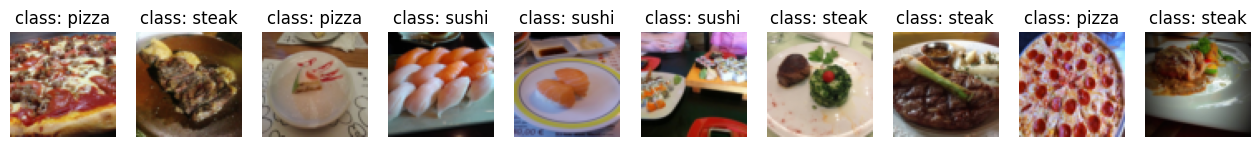

In [241]:
# Disply random images from the image folder custom dataset
disply_random_images(dataset= train_data_custom, n=11 , classes=class_names, seed =None)

### 5.4 Turn custom loaded datasets into Dataloaders


In [249]:
from torch.utils.data import DataLoader
BATCH_SIZE=32
train_dataloader_custom = DataLoader(dataset = train_data_custom, batch_size = BATCH_SIZE, num_workers = 24 , shuffle=True)
test_dataloader_custom = DataLoader(dataset = test_data_custom, batch_size = BATCH_SIZE, num_workers = os.cpu_count(), shuffle = False)

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7fd11f7505b0>,
 <torch.utils.data.dataloader.DataLoader at 0x7fd11f750670>)

In [250]:
# Get image and label from custom dataloader
img_custom, label_custom = next(iter(train_dataloader_custom))
# Printout the shapes
img_custom.shape , label_custom.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

### 6. other data transforms (data augmentation)
In case of image data, this may mean applying various image transformations to the training images.

This practice hopefully results in a model that generalizable to unseen data

let's take a look at one particular type of data augmentation used to train PyTorch vision models to state of the art levels...


In [252]:
# Let's look at trivial augment
from torchvision import transforms
train_transforms = transforms.Compose([transforms.Resize(size=(224,224)),
                                        transforms.TrivialAugmentWide(num_magnitude_bins=31),
                                        transforms.ToTensor()])
test_transforms = transforms.Compose([transforms.Resize(size=(224,224)),
                                        transforms.ToTensor()])


In [253]:
image_path 

PosixPath('data/pizza_steak_sushi')

In [257]:
# GEt all image paths 
image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list

[PosixPath('data/pizza_steak_sushi/test/pizza/540882.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/714866.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/194643.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/2236338.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/3092704.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/309892.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/1925494.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/2124579.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/2019408.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/344397.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/2508636.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/195160.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/416067.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/2218680.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/1152100.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/398345.jpg'),
 PosixPath('data/pizza_steak_sus

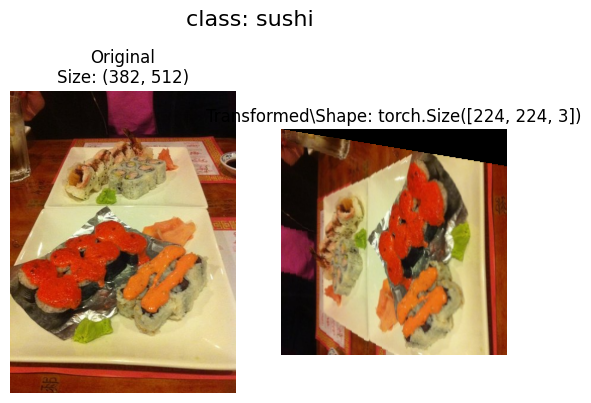

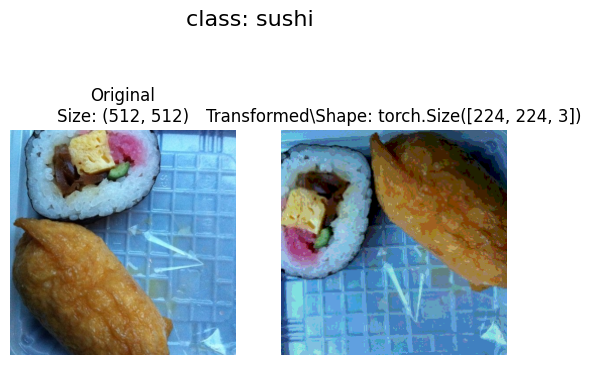

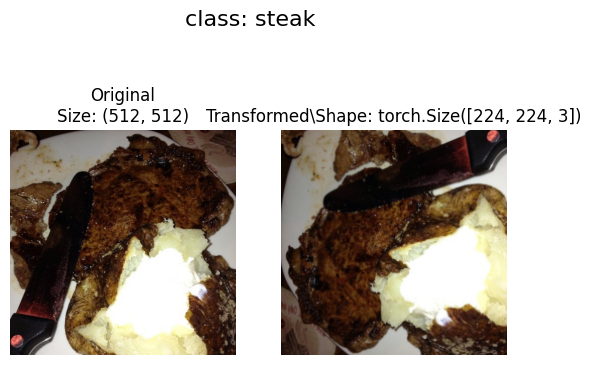

In [262]:
# Plt random transformed images
plot_transformed_images(image_paths= image_path_list, transform= train_transforms, n=3, seed=None)

### 7.1 Creating transforms and loading data for Model 0

In [266]:
# Creating simple transform 
simple_transform = transforms.Compose([
                                        transforms.Resize(size=(64,64)),
                                        transforms.ToTensor()
])

In [270]:
# 1, Load and transform data
from torchvision import datasets
train_data_simple = datasets.ImageFolder(root = train_dir,
                                            transform = simple_transform)
test_data_simple = datasets.ImageFolder(root=test_dir,
                                            transform = simple_transform)

# 2. Turn the datasets into DataLoaders
import os
from torch.utils.data import DataLoader 

# Setup batch size and number of workers
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

# create DataLoader's 
train_dataloader_simple = DataLoader(dataset = train_data,
                                    batch_size = BATCH_SIZE,
                                    shuffle = True,
                                    num_workers = NUM_WORKERS)
test_dataloader_simple = DataLoader(dataset = test_data,
                                    batch_size =BATCH_SIZE,
                                    shuffle = True,
                                    num_workers = NUM_WORKERS)


### 7.2 Create TinyVGG model class

In [302]:
class TinyVGG(nn.Module):
    """ Model architecture copying TinyVGG from CNN explainer"""
    def __init__(self, input_shape: int , hidden_units: int, output_shape :int)->None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels = input_shape, out_channels = hidden_units, kernel_size = 3, padding = 0),
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units, kernel_size = 3, padding = 0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2) # default stride value is same as kernel_size
            )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units, kernel_size = 3, padding = 0),
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units, kernel_size = 3, padding = 0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2) # default stride value is same as kernel_size
            )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features= hidden_units *13*13, out_features=output_shape)
        )
    def forward(self,x):
        x = self.conv_block_1(x)
        #print(x.shape)
        x = self.conv_block_2(x)
        #print(x.shape)
        x = self.classifier(x)
        #print(x.shape)
        return x 
        #return self.classifier(self.conv_block_2(self_block_1(x)))  # Benefits from operator fusion


In [303]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shape = 3, hidden_units=10, output_shape = len(class_names)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

### Try a forward pass on a single image (to test the model)


In [304]:
# Get a single image batch 
image_batch = label_batch = next(iter(train_data))

In [305]:
x_dummy = torch.randn(size=(32,3,64,64)).to(device)

In [306]:
model_0(x_dummy)

tensor([[ 0.0225, -0.0171, -0.0169],
        [ 0.0150, -0.0060, -0.0107],
        [ 0.0176, -0.0171, -0.0116],
        [ 0.0187,  0.0004, -0.0054],
        [ 0.0091, -0.0172, -0.0136],
        [ 0.0046, -0.0048, -0.0291],
        [ 0.0216, -0.0207, -0.0071],
        [ 0.0223,  0.0030, -0.0086],
        [ 0.0067, -0.0110, -0.0100],
        [ 0.0205, -0.0171, -0.0099],
        [ 0.0199, -0.0235,  0.0013],
        [ 0.0131, -0.0112, -0.0087],
        [ 0.0341, -0.0065, -0.0189],
        [ 0.0212, -0.0273, -0.0078],
        [ 0.0169, -0.0155, -0.0144],
        [ 0.0235, -0.0099, -0.0098],
        [ 0.0102, -0.0112, -0.0190],
        [ 0.0039, -0.0059, -0.0035],
        [ 0.0206, -0.0038, -0.0148],
        [ 0.0298, -0.0196,  0.0013],
        [ 0.0297, -0.0107, -0.0102],
        [ 0.0184, -0.0097,  0.0001],
        [ 0.0243, -0.0131, -0.0222],
        [ 0.0009, -0.0126, -0.0069],
        [ 0.0109, -0.0029, -0.0184],
        [ 0.0152, -0.0130, -0.0031],
        [ 0.0196, -0.0105, -0.0070],
 

In [ ]:
# Install torchinfo

# import torchinfo
# from torchinfo import summary
# summary(model_0, input_size = [32,3,64,64]) # To check the model parameters and size

### 7.5 Create train and test loop functions
* train_step(): takes in model and dataloader and train the model on the dataloader
* test_step() : takes in model and dataloader and evaluates the model on the dataloader


In [327]:
# Create train_step()
def train_step(model: torch.nn.Module,
                dataloader : torch.utils.data.DataLoader,
                loss_fn: torch.nn.Module,
                optimizer: torch.optim.Optimizer,
                device=device):
    # Put the model in train mode
    model.train()

    # Setup training loss and train accurcay values
    train_loss, train_acc = 0,0

    # Loop through data loader data batches
    for batch, (X,y) in enumerate(dataloader):
        X,y = X.to(device), y.to(device)
        # 1. Forward pass
        y_pred = model(X)

        #2. calculate the loss
        loss= loss_fn(y_pred, y)
        train_loss+=loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. loss backward
        loss.backward()

        # 5. optimizer step
        optimizer.step()

        # calculate accurate metric
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc +=(y_pred_class == y).sum().item()/len(y_pred)
    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss/ len(dataloader)
    train_acc = train_acc/ len(dataloader)
    return train_loss, train_acc


In [331]:
def test_step(model: torch.nn.Module,
                dataloader: torch.utils.data.DataLoader,
                loss_fn = torch.nn.Module,
                device = device):
    model.eval()
    test_loss, test_acc = 0,0   
    with torch.inference_mode():  
        for batch, (X,y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)
            
            y_pred = model(X)

            loss = loss_fn(y_pred, y)
            test_loss +=loss.item()

            y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
            test_acc += (y_pred_class ==y).sum().item()/len(y_pred)

        test_loss /= len(dataloader)
        test_acc /= len(dataloader)
        return test_loss, test_acc

    
    

### 7.6 Creating a train() function to combine train_step() and test_step()

In [332]:
from tqdm import tqdm
# 1. Create a train function that takes in various model parameters + optimizer + Dataloader + loss function

def train(model:torch.nn.Module,
            train_dataloader: torch.utils.data.DataLoader,
            test_dataloader: torch.utils.data.DataLoader,
            optimizer: torch.optim.Optimizer,
            loss_fn : torch.nn.Module = nn.CrossEntropyLoss(),
            epochs:int =5,
            device=device):
    # 2. Create empty results dictionary
    results = {"train_loss":[], "train_acc":[], "test_loss":[], "test_acc":[]}
    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        print(f"Epoch: {epoch}....")
        train_loss, train_acc = train_step(model = model_0,
                                            dataloader= train_dataloader, 
                                            loss_fn = loss_fn,
                                            optimizer=optimizer,
                                            device=device)
        test_loss, test_acc = test_step(model=model_0, 
                                        dataloader = test_dataloader,
                                        loss_fn = loss_fn,
                                        device = device)
        # 4. print out what's  happening
        print(f"Epoch: {epoch} | Train_Loss: {train_loss:.4f}| Train_acc: {train_acc:.4f} | Test_Loss: {test_loss:.4f} | Test_acc: {test_acc:.4f}")

        # 5. update result dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)
    
    # 6. Return the filled result at the end of the epochs
    return results


### 7.7 Train and evaluate model 0

In [340]:
# set random seeds 
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set the number of epochs
NUM_EPOCHS = 50

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3,
                    hidden_units=10,
                    output_shape = len(train_data.classes)).to(device)
# Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr =0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results= train(model=model_0, train_dataloader = train_dataloader_simple, test_dataloader = test_dataloader_simple, optimizer = optimizer, loss_fn = loss_fn, epochs=NUM_EPOCHS)

# End the timerand print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 0....


  2%|▏         | 1/50 [00:04<03:48,  4.66s/it]

Epoch: 0 | Train_Loss: 1.1063| Train_acc: 0.3086 | Test_Loss: 1.0982 | Test_acc: 0.3513
Epoch: 1....


  4%|▍         | 2/50 [00:09<03:41,  4.62s/it]

Epoch: 1 | Train_Loss: 1.0834| Train_acc: 0.4414 | Test_Loss: 1.0765 | Test_acc: 0.4223
Epoch: 2....


  6%|▌         | 3/50 [00:13<03:35,  4.59s/it]

Epoch: 2 | Train_Loss: 1.1063| Train_acc: 0.2812 | Test_Loss: 1.0838 | Test_acc: 0.3930
Epoch: 3....


  8%|▊         | 4/50 [00:18<03:30,  4.57s/it]

Epoch: 3 | Train_Loss: 1.0753| Train_acc: 0.4805 | Test_Loss: 1.0730 | Test_acc: 0.4943
Epoch: 4....


 10%|█         | 5/50 [00:22<03:25,  4.57s/it]

Epoch: 4 | Train_Loss: 1.0647| Train_acc: 0.4023 | Test_Loss: 1.0526 | Test_acc: 0.5445
Epoch: 5....


 12%|█▏        | 6/50 [00:27<03:21,  4.59s/it]

Epoch: 5 | Train_Loss: 1.0033| Train_acc: 0.5703 | Test_Loss: 1.0555 | Test_acc: 0.2803
Epoch: 6....


 14%|█▍        | 7/50 [00:32<03:17,  4.59s/it]

Epoch: 6 | Train_Loss: 0.9039| Train_acc: 0.5742 | Test_Loss: 1.0869 | Test_acc: 0.3617
Epoch: 7....


 16%|█▌        | 8/50 [00:36<03:11,  4.57s/it]

Epoch: 7 | Train_Loss: 0.9547| Train_acc: 0.4609 | Test_Loss: 1.0687 | Test_acc: 0.3513
Epoch: 8....


 18%|█▊        | 9/50 [00:41<03:05,  4.52s/it]

Epoch: 8 | Train_Loss: 0.9007| Train_acc: 0.5234 | Test_Loss: 1.0259 | Test_acc: 0.4962
Epoch: 9....


 20%|██        | 10/50 [00:45<03:01,  4.55s/it]

Epoch: 9 | Train_Loss: 0.8185| Train_acc: 0.6211 | Test_Loss: 0.9844 | Test_acc: 0.4432
Epoch: 10....


 22%|██▏       | 11/50 [00:50<02:58,  4.57s/it]

Epoch: 10 | Train_Loss: 0.9046| Train_acc: 0.5430 | Test_Loss: 1.0175 | Test_acc: 0.4943
Epoch: 11....


 24%|██▍       | 12/50 [00:54<02:54,  4.60s/it]

Epoch: 11 | Train_Loss: 0.8140| Train_acc: 0.6719 | Test_Loss: 1.0402 | Test_acc: 0.3835
Epoch: 12....


 26%|██▌       | 13/50 [00:59<02:48,  4.56s/it]

Epoch: 12 | Train_Loss: 0.7979| Train_acc: 0.6367 | Test_Loss: 1.0536 | Test_acc: 0.4034
Epoch: 13....


 28%|██▊       | 14/50 [01:03<02:44,  4.56s/it]

Epoch: 13 | Train_Loss: 0.7504| Train_acc: 0.6758 | Test_Loss: 1.0422 | Test_acc: 0.4735
Epoch: 14....


 30%|███       | 15/50 [01:08<02:41,  4.61s/it]

Epoch: 14 | Train_Loss: 0.7464| Train_acc: 0.6914 | Test_Loss: 1.0725 | Test_acc: 0.5142
Epoch: 15....


 32%|███▏      | 16/50 [01:13<02:36,  4.60s/it]

Epoch: 15 | Train_Loss: 0.8170| Train_acc: 0.5820 | Test_Loss: 1.1365 | Test_acc: 0.5445
Epoch: 16....


 34%|███▍      | 17/50 [01:17<02:31,  4.58s/it]

Epoch: 16 | Train_Loss: 0.7701| Train_acc: 0.6797 | Test_Loss: 1.0449 | Test_acc: 0.4138
Epoch: 17....


 36%|███▌      | 18/50 [01:22<02:26,  4.57s/it]

Epoch: 17 | Train_Loss: 0.7569| Train_acc: 0.6641 | Test_Loss: 1.0734 | Test_acc: 0.4337
Epoch: 18....


 38%|███▊      | 19/50 [01:27<02:22,  4.59s/it]

Epoch: 18 | Train_Loss: 0.7081| Train_acc: 0.7266 | Test_Loss: 1.0312 | Test_acc: 0.5142
Epoch: 19....


 40%|████      | 20/50 [01:31<02:18,  4.61s/it]

Epoch: 19 | Train_Loss: 0.7168| Train_acc: 0.7031 | Test_Loss: 1.1263 | Test_acc: 0.4138
Epoch: 20....


 42%|████▏     | 21/50 [01:36<02:13,  4.62s/it]

Epoch: 20 | Train_Loss: 0.6815| Train_acc: 0.7031 | Test_Loss: 1.1471 | Test_acc: 0.4328
Epoch: 21....


 44%|████▍     | 22/50 [01:40<02:08,  4.57s/it]

Epoch: 21 | Train_Loss: 0.6796| Train_acc: 0.7266 | Test_Loss: 1.0792 | Test_acc: 0.4536
Epoch: 22....


 46%|████▌     | 23/50 [01:45<02:04,  4.60s/it]

Epoch: 22 | Train_Loss: 0.7740| Train_acc: 0.5938 | Test_Loss: 1.0459 | Test_acc: 0.4953
Epoch: 23....


 48%|████▊     | 24/50 [01:50<02:00,  4.64s/it]

Epoch: 23 | Train_Loss: 0.8544| Train_acc: 0.5391 | Test_Loss: 1.0224 | Test_acc: 0.4848
Epoch: 24....


 50%|█████     | 25/50 [01:54<01:54,  4.60s/it]

Epoch: 24 | Train_Loss: 0.7161| Train_acc: 0.7266 | Test_Loss: 1.1154 | Test_acc: 0.5672
Epoch: 25....


 52%|█████▏    | 26/50 [01:59<01:50,  4.60s/it]

Epoch: 25 | Train_Loss: 0.8017| Train_acc: 0.6172 | Test_Loss: 0.9927 | Test_acc: 0.4631
Epoch: 26....


 54%|█████▍    | 27/50 [02:03<01:45,  4.60s/it]

Epoch: 26 | Train_Loss: 0.8276| Train_acc: 0.7188 | Test_Loss: 0.9701 | Test_acc: 0.4214
Epoch: 27....


 56%|█████▌    | 28/50 [02:08<01:41,  4.62s/it]

Epoch: 27 | Train_Loss: 0.7522| Train_acc: 0.6562 | Test_Loss: 0.9886 | Test_acc: 0.4943
Epoch: 28....


 58%|█████▊    | 29/50 [02:13<01:37,  4.63s/it]

Epoch: 28 | Train_Loss: 0.7328| Train_acc: 0.6992 | Test_Loss: 0.9847 | Test_acc: 0.5152
Epoch: 29....


 60%|██████    | 30/50 [02:17<01:32,  4.61s/it]

Epoch: 29 | Train_Loss: 0.7408| Train_acc: 0.6953 | Test_Loss: 1.0082 | Test_acc: 0.5142
Epoch: 30....


 62%|██████▏   | 31/50 [02:22<01:28,  4.64s/it]

Epoch: 30 | Train_Loss: 0.7546| Train_acc: 0.5898 | Test_Loss: 1.0098 | Test_acc: 0.5152
Epoch: 31....


 64%|██████▍   | 32/50 [02:27<01:23,  4.62s/it]

Epoch: 31 | Train_Loss: 0.7270| Train_acc: 0.7266 | Test_Loss: 1.0466 | Test_acc: 0.5473
Epoch: 32....


 66%|██████▌   | 33/50 [02:31<01:18,  4.62s/it]

Epoch: 32 | Train_Loss: 0.6797| Train_acc: 0.7461 | Test_Loss: 0.9563 | Test_acc: 0.5227
Epoch: 33....


 68%|██████▊   | 34/50 [02:36<01:13,  4.61s/it]

Epoch: 33 | Train_Loss: 0.8307| Train_acc: 0.6055 | Test_Loss: 1.1423 | Test_acc: 0.4432
Epoch: 34....


 70%|███████   | 35/50 [02:40<01:09,  4.61s/it]

Epoch: 34 | Train_Loss: 0.6285| Train_acc: 0.7461 | Test_Loss: 0.9521 | Test_acc: 0.6070
Epoch: 35....


 72%|███████▏  | 36/50 [02:45<01:05,  4.69s/it]

Epoch: 35 | Train_Loss: 0.7554| Train_acc: 0.5938 | Test_Loss: 0.9777 | Test_acc: 0.5663
Epoch: 36....


 74%|███████▍  | 37/50 [02:50<01:01,  4.69s/it]

Epoch: 36 | Train_Loss: 0.7298| Train_acc: 0.6445 | Test_Loss: 1.2688 | Test_acc: 0.4650
Epoch: 37....


 76%|███████▌  | 38/50 [02:55<00:56,  4.72s/it]

Epoch: 37 | Train_Loss: 0.7053| Train_acc: 0.7461 | Test_Loss: 1.1150 | Test_acc: 0.4252
Epoch: 38....


 78%|███████▊  | 39/50 [02:59<00:51,  4.72s/it]

Epoch: 38 | Train_Loss: 0.8754| Train_acc: 0.6055 | Test_Loss: 1.1043 | Test_acc: 0.4441
Epoch: 39....


 80%|████████  | 40/50 [03:04<00:46,  4.69s/it]

Epoch: 39 | Train_Loss: 0.7144| Train_acc: 0.6953 | Test_Loss: 1.0501 | Test_acc: 0.4631
Epoch: 40....


 82%|████████▏ | 41/50 [03:09<00:42,  4.72s/it]

Epoch: 40 | Train_Loss: 0.6535| Train_acc: 0.7500 | Test_Loss: 1.0025 | Test_acc: 0.4744
Epoch: 41....


 84%|████████▍ | 42/50 [03:14<00:37,  4.74s/it]

Epoch: 41 | Train_Loss: 0.7078| Train_acc: 0.7266 | Test_Loss: 1.0056 | Test_acc: 0.4441
Epoch: 42....


 86%|████████▌ | 43/50 [03:18<00:32,  4.70s/it]

Epoch: 42 | Train_Loss: 0.6114| Train_acc: 0.7734 | Test_Loss: 1.1215 | Test_acc: 0.5966
Epoch: 43....


 88%|████████▊ | 44/50 [03:23<00:28,  4.73s/it]

Epoch: 43 | Train_Loss: 0.6420| Train_acc: 0.7617 | Test_Loss: 1.0548 | Test_acc: 0.5152
Epoch: 44....


 90%|█████████ | 45/50 [03:28<00:23,  4.72s/it]

Epoch: 44 | Train_Loss: 0.5547| Train_acc: 0.7852 | Test_Loss: 1.1114 | Test_acc: 0.5057
Epoch: 45....


 92%|█████████▏| 46/50 [03:32<00:18,  4.70s/it]

Epoch: 45 | Train_Loss: 0.5676| Train_acc: 0.8008 | Test_Loss: 1.0528 | Test_acc: 0.5559
Epoch: 46....


 94%|█████████▍| 47/50 [03:37<00:14,  4.70s/it]

Epoch: 46 | Train_Loss: 0.6581| Train_acc: 0.6797 | Test_Loss: 1.0659 | Test_acc: 0.5672
Epoch: 47....


 96%|█████████▌| 48/50 [03:42<00:09,  4.68s/it]

Epoch: 47 | Train_Loss: 0.8577| Train_acc: 0.6445 | Test_Loss: 1.0398 | Test_acc: 0.5672
Epoch: 48....


 98%|█████████▊| 49/50 [03:46<00:04,  4.65s/it]

Epoch: 48 | Train_Loss: 0.5945| Train_acc: 0.7461 | Test_Loss: 0.9854 | Test_acc: 0.5256
Epoch: 49....


100%|██████████| 50/50 [03:51<00:00,  4.63s/it]

Epoch: 49 | Train_Loss: 0.5535| Train_acc: 0.7695 | Test_Loss: 0.9532 | Test_acc: 0.5350
Total training time: 231.451 seconds


In [341]:
model_0_results["train_loss"]

[1.1062823981046677,
 1.0834283977746964,
 1.1063275337219238,
 1.0753188580274582,
 1.064670890569687,
 1.0033026337623596,
 0.9039297588169575,
 0.954674668610096,
 0.9007133692502975,
 0.8185365283861756,
 0.9045750424265862,
 0.8140000253915787,
 0.7978958822786808,
 0.7503521926701069,
 0.7464441191405058,
 0.8170221745967865,
 0.7701371014118195,
 0.7568503469228745,
 0.7081033973954618,
 0.7168450206518173,
 0.6815449167042971,
 0.6796376504935324,
 0.773966372013092,
 0.8544293642044067,
 0.7160526616498828,
 0.8016908541321754,
 0.8275795429944992,
 0.7522312253713608,
 0.7327769622206688,
 0.7407511249184608,
 0.7545600086450577,
 0.7270135283470154,
 0.6797328442335129,
 0.8306583166122437,
 0.6285321209579706,
 0.7554049342870712,
 0.7297639101743698,
 0.7052922248840332,
 0.8753537088632584,
 0.7143603749573231,
 0.6534550487995148,
 0.7077727690339088,
 0.6113520786166191,
 0.6420146450400352,
 0.5546632912009954,
 0.5676214843988419,
 0.6581064648926258,
 0.8577482774853

### 7.8 Plot the loss curves of Model 0 
A loss curve is a way of tracking your model's preogress over time.


In [342]:
# Get the dictionary keys
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [348]:
def plot_loss_curves(results: Dict[str, List[float]]):
    """ Plots training curves of a results dictionary."""
    # Get the loss values of the results dictionary(training and test)
    loss = results["train_loss"]
    test_loss = results["test_loss"]

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results["train_acc"]
    test_accuracy = results["test_acc"]

    # Figure out how many epochs there were
    epochs = range(len(results["train_loss"]))

    # setup a plot
    plt.figure(figsize = (15,7))

    # Plot the loss
    plt.subplot(1,2,1)
    plt.plot(epochs, loss, label ="train_loss")
    plt.plot(epochs, test_loss, label = "test_loss")
    plt.title("Loss")
    plt.xlabel("epochs")
    plt.legend()

    # Plot the accuracy
    plt.subplot(1,2,2)
    plt.plot(epochs, accuracy, label="train_accuracy")
    plt.plot(epochs, test_accuracy, label = "test_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()




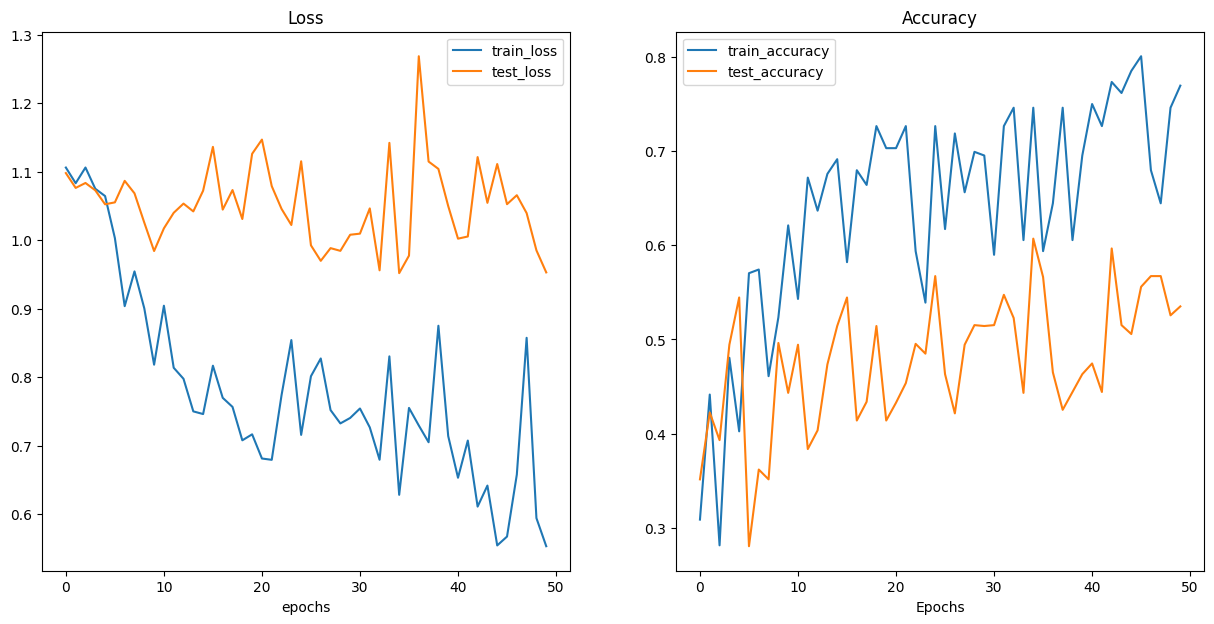

In [349]:
plot_loss_curves(model_0_results)